# **Synthetic Learning Behavior Analysis: Extract**

## Objectives

* By the end of the extraction phase, I will:
    1. Import the dataset from Kaggle.
    2. Check the data for missing and null values, and duplicates.
    3. Define a data dictionary.
    4. Analyze summary statistics.
    5. Analyze correlation.
    6. Explore further through visualizations.
    7. State assumptions.
    8. Summarize findings.


## Inputs

* [Task outline](https://code-institute-org.github.io/5P-Assessments-Handbook/da-ai-bootcamp-capstone-prelims.html)
* [Kaggle dataset](https://www.kaggle.com/datasets/adilshamim8/personalized-learning-and-adaptive-education-dataset/data)
* Libraries from the requirements.txt file 


## Outputs

* Overview of the dataset, its features, and how they are interacting.
* Basic visualizations that complement the overview.
* Summary of the findings and an overview of the next step. 

## Disclaimer

* This dataset is synthetically created, as called out by the owner in Kaggle. The observations I find here may reflect real-world behavior to some degree. However, I will not use the dataset to draw causal inferences. Having said that, I will analyze data and develop exploratory models that will serve as placeholders for similar real-world applications.

---

# Import key libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mshin\\vs-code-projects\\synthetic_learning_behavior_analysis\\project_work-jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mshin\\vs-code-projects\\synthetic_learning_behavior_analysis'

# Data import

Manually downloaded the source data file from [Kaggle](https://www.kaggle.com/datasets/adilshamim8/personalized-learning-and-adaptive-education-dataset/data), saved it locally (within data > source_data), and loaded it onto VSCode.

In [8]:
df = pd.read_csv("data/source_data/personalized_learning_dataset.csv")# Loading the dataset
print(df.shape)
df.head(10)

(10000, 15)


,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No
5,S00006,34,Male,Undergraduate,Web Development,184,1,87,34,70,Medium,43,Visual,4,No
6,S00007,45,Male,High School,Cybersecurity,454,3,69,46,83,Low,37,Kinesthetic,5,No
7,S00008,47,Male,High School,Cybersecurity,425,2,62,23,52,High,35,Reading/Writing,5,No
8,S00009,48,Male,Undergraduate,Cybersecurity,359,1,59,10,88,Medium,49,Reading/Writing,2,No
9,S00010,45,Female,Undergraduate,Data Science,263,4,63,30,99,Low,61,Auditory,3,No


This dataset contains **10,000 rows** (or instances) and **15 columns** (or features). 

**Disclaimer:** After going through the Provenance section in Kaggle, I understand that this dataset is synthetically generated. While it is based on real-world observations, I am aware that it is not the ground truth. I will ensure that my observations, claims, or inferences are framed carefully.

**Note on Data Privacy and Ethics:** The Student_ID feature is anonymized to ensure data privacy. This is a best practice to protect identity and ensure that the data is used in an ethically-sound manner.

During the Transformation phase, I will determine whethere to keep or drop the Student_ID feature.

In [21]:
df.info() #Reviewing the data types to understand the data better.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

This dataset explains how learners interact with digital learning experiences, such as training course, on a learning platform. The data consists of 8 numerical features and 7 non-numerical or object-type features.

* Numerical data: Consists of a number. For instance, Time_Spent_on_Videos is a hard data point generated based on how long learners spend on reviewing videos.

* Descriptive data: Describes a choice or nature of behaviour. For instance, Course_Name and Learning_Style describe learners' preferences. 

* Categorical data: Provides a bucket or category to classify certain behaviors. For instance, Engagement_Level categorizes learners' motivation level into high, medium, or low.

I will determine how to encode the categorical features during the Transformation phase. This will convert the datatypes from "object" to "integer" making it easy for the machine to detect patterns.  

In [22]:
df.isnull().sum() #Checking missing values in the dataset.

Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

There are no missing values or nan values. Considering it is an engineered dataset, this is not surprising.

In [11]:
(df == 0).sum() #Checking for zero values in the dataset as this can cause a problem during statistical analysis.

Student_ID                      0
Age                             0
Gender                          0
Education_Level                 0
Course_Name                     0
Time_Spent_on_Videos            0
Quiz_Attempts                   0
Quiz_Scores                     0
Forum_Participation           204
Assignment_Completion_Rate      0
Engagement_Level                0
Final_Exam_Score                0
Learning_Style                  0
Feedback_Score                  0
Dropout_Likelihood              0
dtype: int64

There are **204** zero-value entries under **Forum_Participation**. Additionally, the zero-value entries are limited to this feature alone. Considering this a huge dataset with 10, 000 entries, having 204 learners not interacting on a forum is quite real-world. I am assuming that these are valid and not errors.

**Assumption:** The zero-value entries within Forum_Participation feature are valid and true entries. 

In [12]:
df_duplicate = df[df.duplicated()] #Checking for duplicated values in the dataset.
df_duplicate

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood


An empty dataframe indicates that there are no duplicate values. I want to confirm this.

In [13]:
df.duplicated().sum() #Rechecking to confirm that there are indeed no duplicates.

0

There are no duplicates. The author has created quite a smooth dataset. The challenge lies in how to analyze the data. 

**Note**: Ideally, upon finding any disturbances in the data, you would clean and create a copy for further analysis. However, the engineered dataset does not require cleaning. 

Having said that, I will create a copy of it before I close this phase. This will ensure that I do not edit the source of truth.

---

# Data dictionary

Here are the different features (columns) along with their meaning. This helps with reviewing and understanding the data better.

## Dictionary

|Feature| Explanation|
|------------------------------|-----------------------------------------------------------------------------| 
|Student_ID| Unique identifier for each learner|
|Age| Age of the learners|
|Gender| Gender of the learners|
|Education_Level| The level of schooling|
|Course_Name| Learners' choice of digital training session|
|Time_Spent_on_Videos| The number of minutes learners spend on reviewing videos|
|Quiz_Attempts| The number of trials on a quiz|
|Quiz_Scores| The measurable outcome of a quiz (measured in percentage)|
|Forum_Participation| The number of times learners participated in a discussion forum|
|Assignment_Completion_Rate| The percentage of completed assignments|
|Engagement_Level| The level of learner engagement (based on activity metrics)|
|Final_Exam_Score| The measurable outcome of the learning session (measured in percentage)|
|Learning_Style| Preferred method of learning|
|Feedback_Score| Measure of learners' rating for the course (measured upon 5)|
|Dropout_Likelihood| Probability of a learner dropping out of the course|

										

**Source credit:** Utilized the basic explanation found in Kaggle and edited it further based on my industry experience. I used Kaggle to come up with certain contextual information (such as how time spent on videos is measured, how quiz scores are measured, and so on).

---

# Business requirements

As a digital learning service provider, here are the key problems the data should help me resolve.

1. As a digital learning service provider, we want to group learners and enable adaptive learning experiences, so that we engage better with the existing users. 
    
    1.1. Meaningful clusters exist within the dataset

2. As a program manager, I want to be able to predict dropout probability, so that we can engage with high-risk users. 
    
    2.1. Learning Style impacts dropout likelihood

3. As an instructional design manager, I want to understand what factors impact engagement levels so that I can drive my team to design user-friendly learning experiences. 
    
    3.1. Time spent on videos is associated with engagement level

4. As an instructional design manager, I want to analyze how learners choice of course and learning styles impact engagement level, so that we can adapt learning experiences. 
    
    4.1. Course choice impacts feedback and engagement level

---

# Ethical implications

1. Student_ID is an attempt at anonymizing the data. It helps protect identity and sensitive information, around learning concepts and reproducing them as tested by an assessment.

2. Learners need to be informed about the surveys they are expected to participate in. They need to be informed on how the data collected will be used and the process needs to be designed in accordance with GDPR(General Data Protection Regulations).

3. Learners also need to be informed beforehand, especially in a corporate setup, if their performance on these courses will in any way affect their workplace performance.

4. Respecting learners' freedom of choice enables them to interact with systems in a safe environment. An opt-out option should be included right while designing the surveys (or before learners' LMS interaction begins) to ensure that learners are conscious of their choice and are free to revoke any acesss to information, if they wish to do so.

---

# Data exploration

Exploring how data is distributed and how different features are interacting with one another.

## Describing the data

Summarizing how data is distributed.

In [14]:
df.describe(include = "all") #Checking the summary statistics to understand how the data is distributed.

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
count,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000,10000
unique,10000,NaN,3,3,5,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,2
top,S00001,NaN,Female,Undergraduate,Machine Learning,NaN,NaN,NaN,NaN,NaN,Medium,NaN,Reading/Writing,NaN,No
freq,1,NaN,4886,5070,2043,NaN,NaN,NaN,NaN,NaN,4927,NaN,2554,NaN,8043
mean,NaN,32.137700,NaN,NaN,NaN,255.375400,2.500500,64.578600,24.616200,69.546800,NaN,64.697000,NaN,3.012600,NaN
std,NaN,10.062647,NaN,NaN,NaN,141.656392,1.122642,20.289125,14.330305,17.360782,NaN,20.096417,NaN,1.421423,NaN
min,NaN,15.000000,NaN,NaN,NaN,10.000000,1.000000,30.000000,0.000000,40.000000,NaN,30.000000,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,131.000000,1.000000,47.000000,12.000000,54.000000,NaN,47.000000,NaN,2.000000,NaN
50%,NaN,32.000000,NaN,NaN,NaN,257.000000,3.000000,65.000000,25.000000,69.000000,NaN,65.000000,NaN,3.000000,NaN
75%,NaN,41.000000,NaN,NaN,NaN,378.000000,4.000000,82.000000,37.000000,85.000000,NaN,82.000000,NaN,4.000000,NaN


The above summary statistics reveals the following:

1. Learners are aged between 15 - 49.

2. The dataset contains samples from three genders. Female samples are the highest.

3. The average number of minutes learners spend on videos is 255.37. The mean provides the average.

4. Forum_Participation indicates that some learners are not participating in the forum.

5. The minimum assignment completion rate is 40 percent.

6. A little less than 50 percent (49.27 %) show medium engagement level. 

7. The average final assessment score of 64.69 percent likely indicates healthy completion rates within the synthetic dataset. The standard deviation, which indicates how much assessment scores vary, is 20. This means that learners could score 20 percentage points above or below 64.69.

8. The dropout likelihood score, with 80.43% "No" values, indicates that learners are less likely to drop out of courses. 

---

## Bias in the dataset

Gender and Dropout_Likelihood are highly biased. While male and female learners are quite equally distributed, "other" gender is very sparse.

Similarly, dropout likelihood is also highly biased with only 1957 learners likely to dropout.

**Business implication:** For the purpose of this sprint, I recommend we retain the bias. However, we will need to revisit this and determine how we want to deal with it in the next sprint. If we remove these samples, we will be removing a significant amount of data, which may impact to how well we can detect patterns. 

---

## Data distribution: Categorical 

Taking a deeper look at the unique values and counts of each column for better visibility.

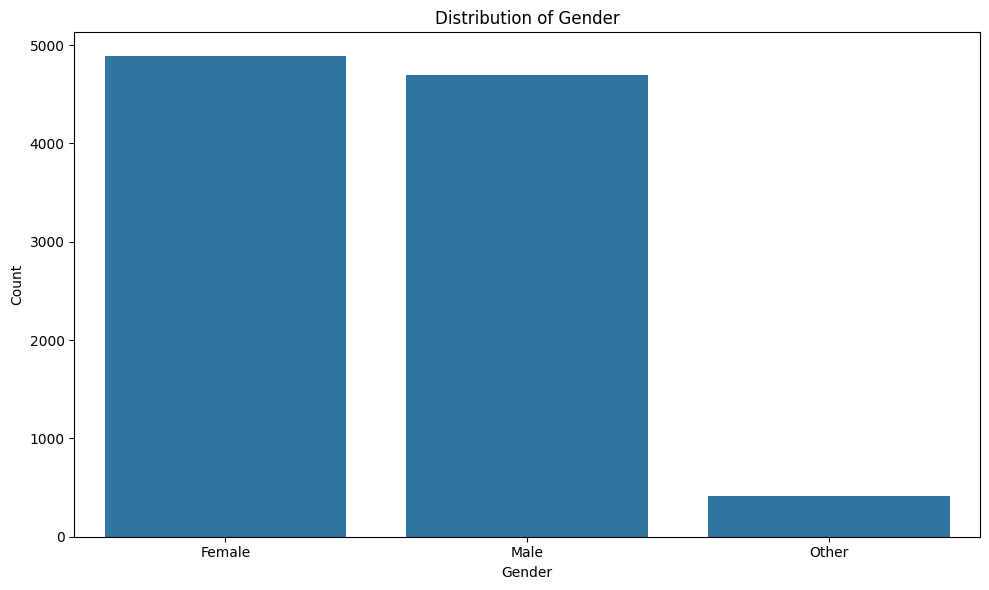

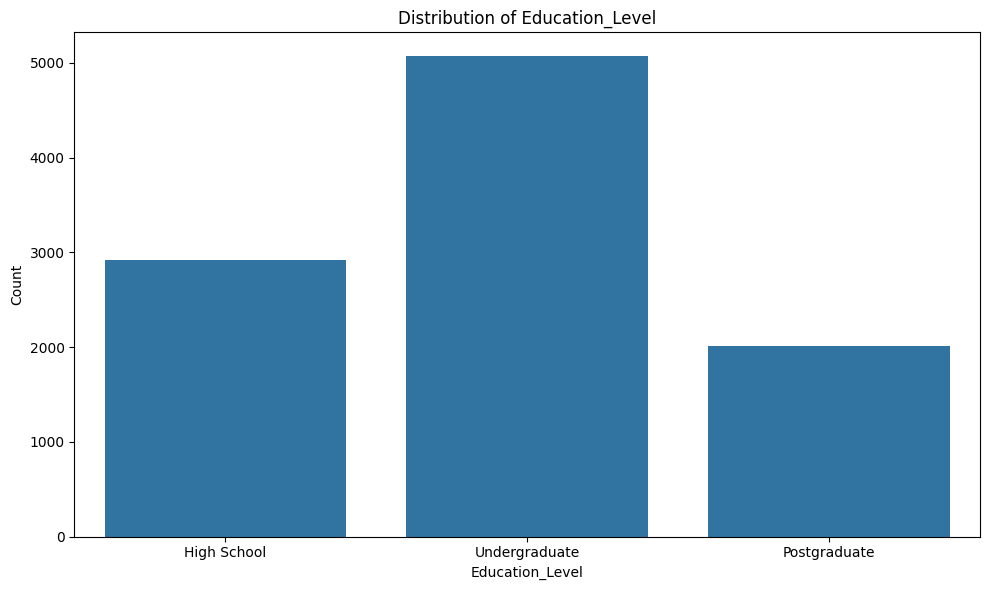

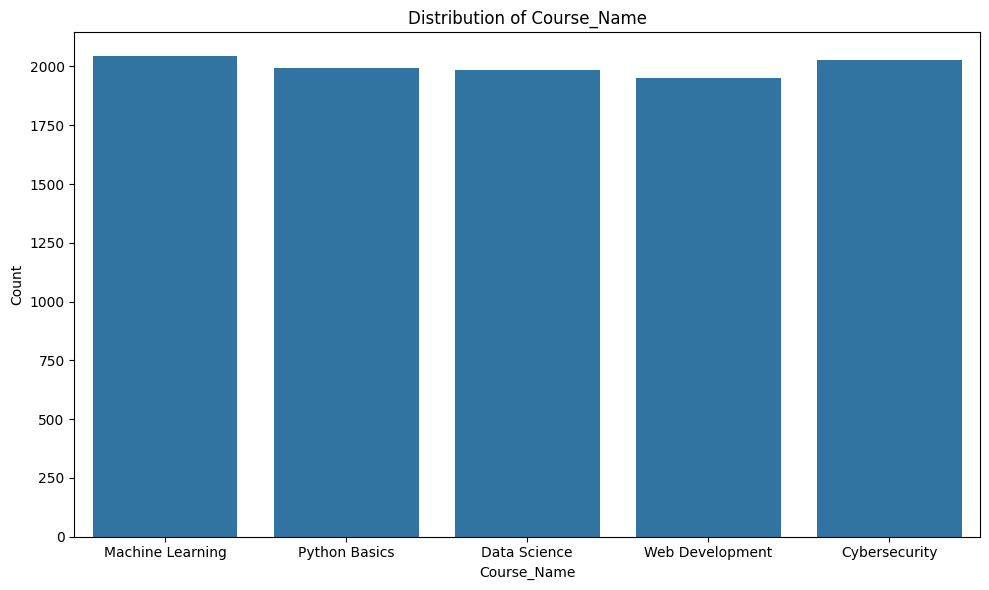

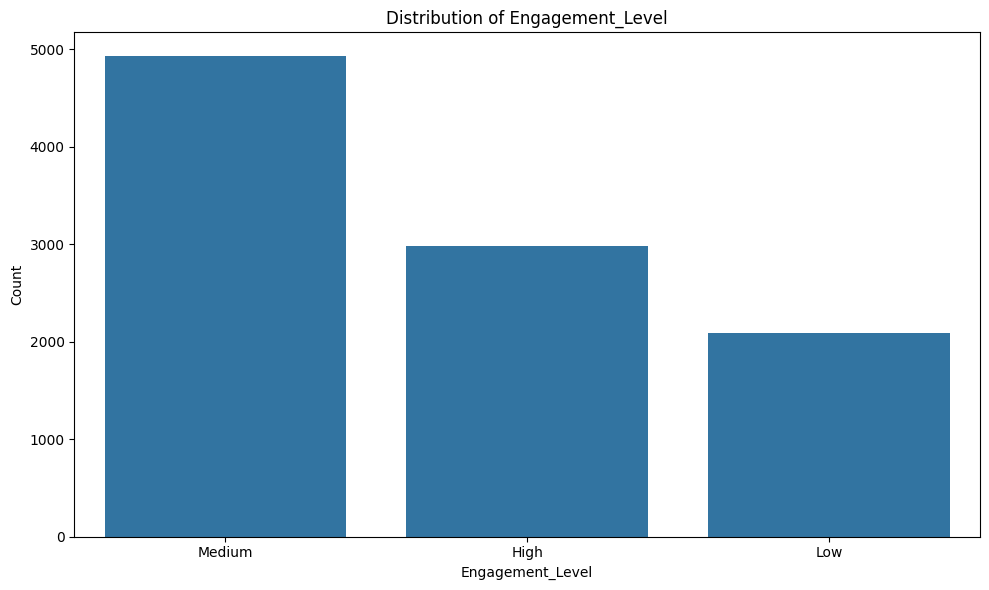

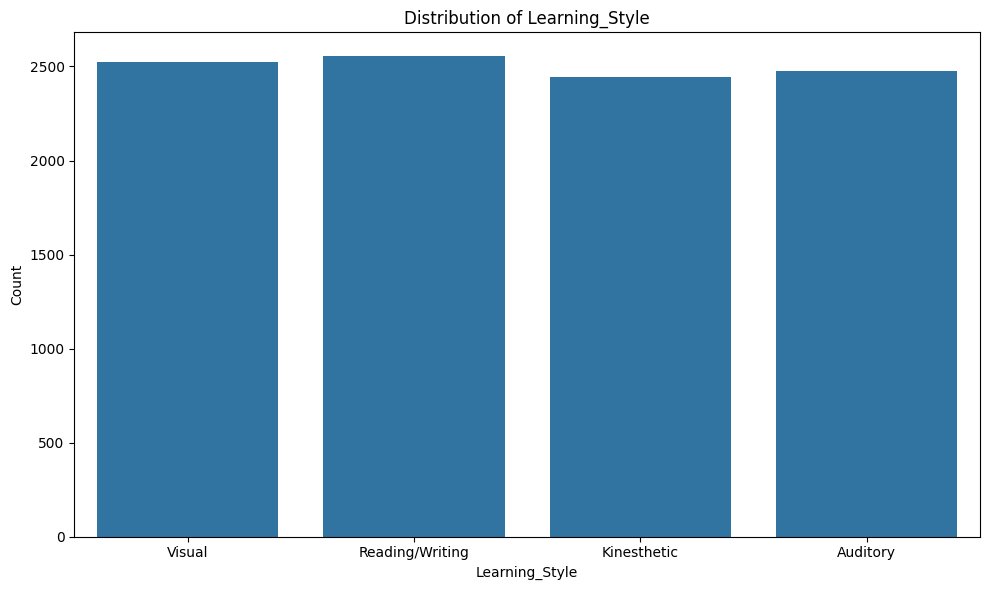

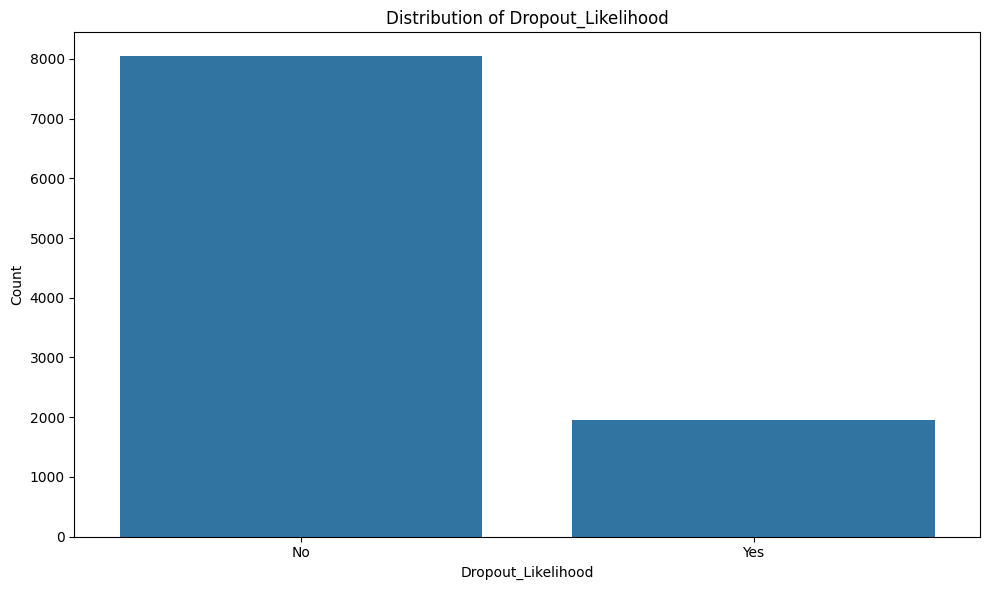

In [15]:
for col in df.select_dtypes(include = "object").columns[1:]: #Dropping the student_id column as it is not relevant for analysis.
    plt.figure(figsize=(10, 6))
    sns.countplot(data = df, x = col) #Understood that countplot is widely used for categorical data through my interactions with ChatGPT. Also, this is a good way to get the unique categories within each feature.
    plt.title(f"Distribution of {col}") 
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

**Key observations:**

1. Gender, Education_Level, Engagement_Level, and Dropout_Likelihood are imbalanced in distribution. 

2. Course_Name and Learning_Style are uniformly distributed with almost the same number of datapoints within each of these features.

3. The gender countplot reveals that there are very few learners who marked their gender as others. Female learners are slightly higher than male counterparts.

4. Most of the learners in the dataset are undergraduates.

5. Most of the learners are not likely to dropout.

**Thought credit:** I iterated with ChatGPT as some of the values in the x-axis were overruning one another and it recommended I used a histogram to avoid this confusion. That led me to discover when countplot is used over histogram. Following the recommendation, I created a separate countplot for categorical vairable. 

The recommendation made sense as you would want to "count" the categorical variables and review how they are distributed.

---

## Data Distribution: Numerical

Reviewing the distribution of numeric features.

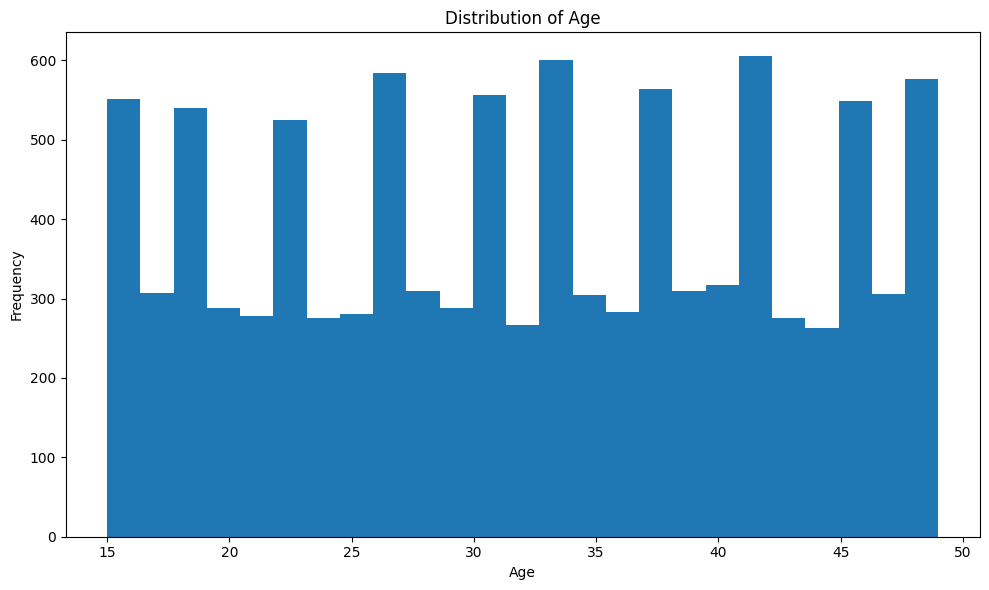

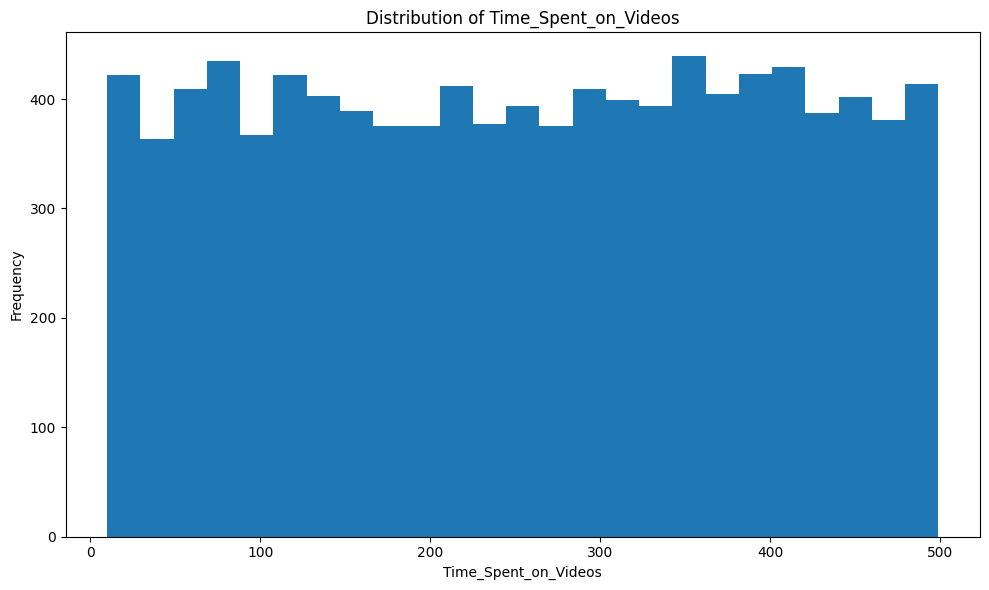

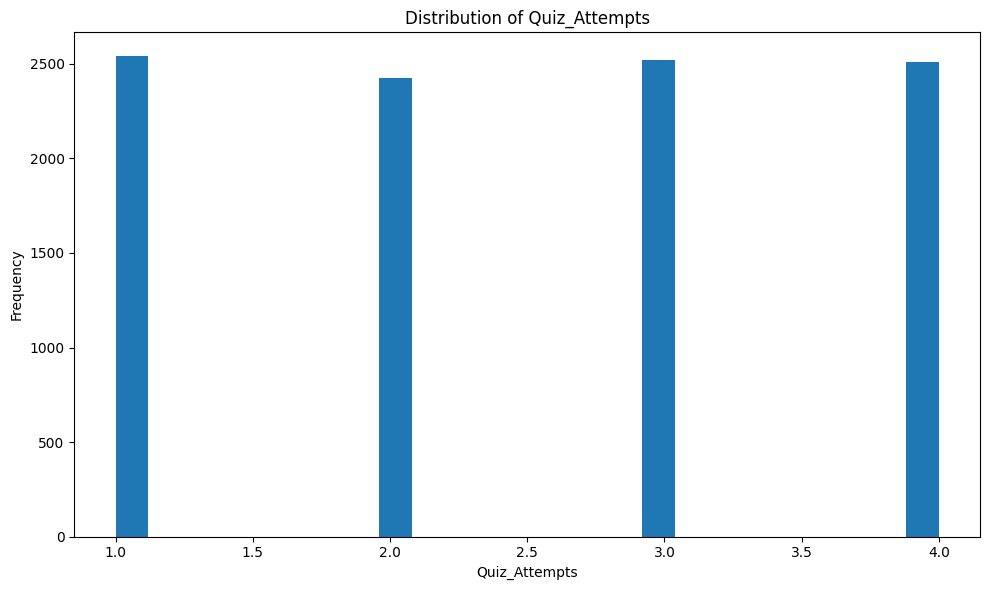

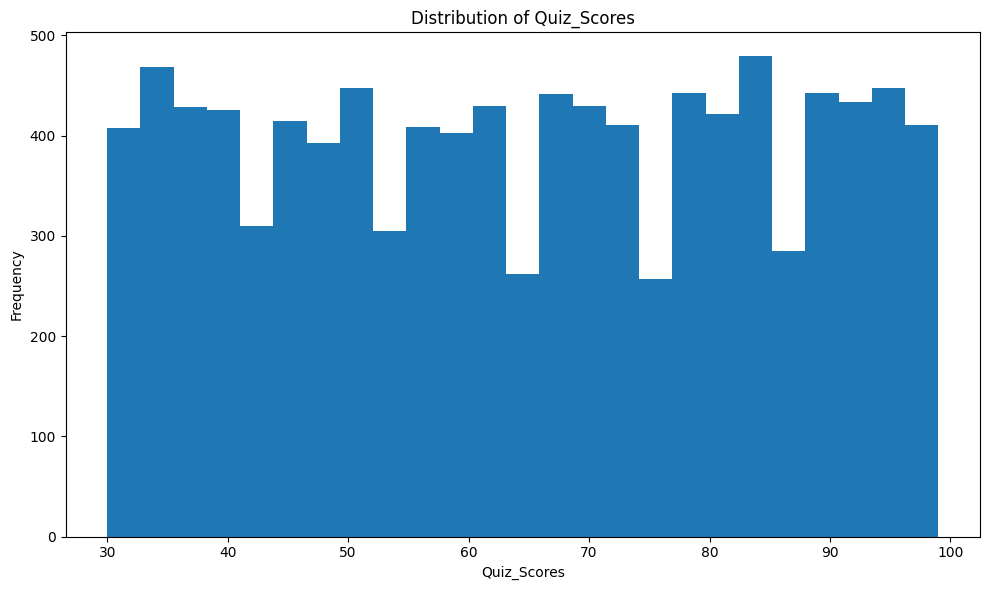

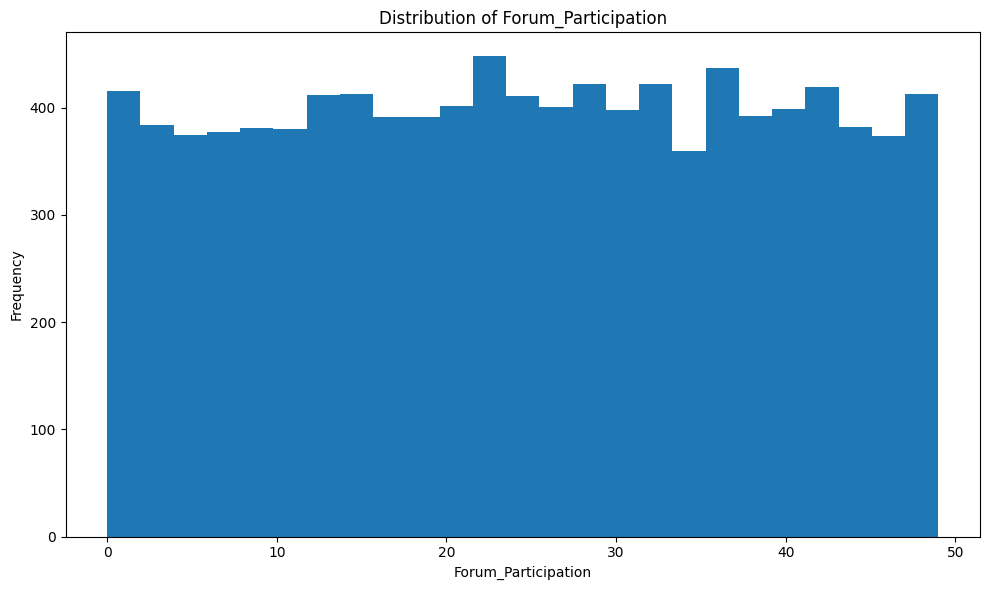

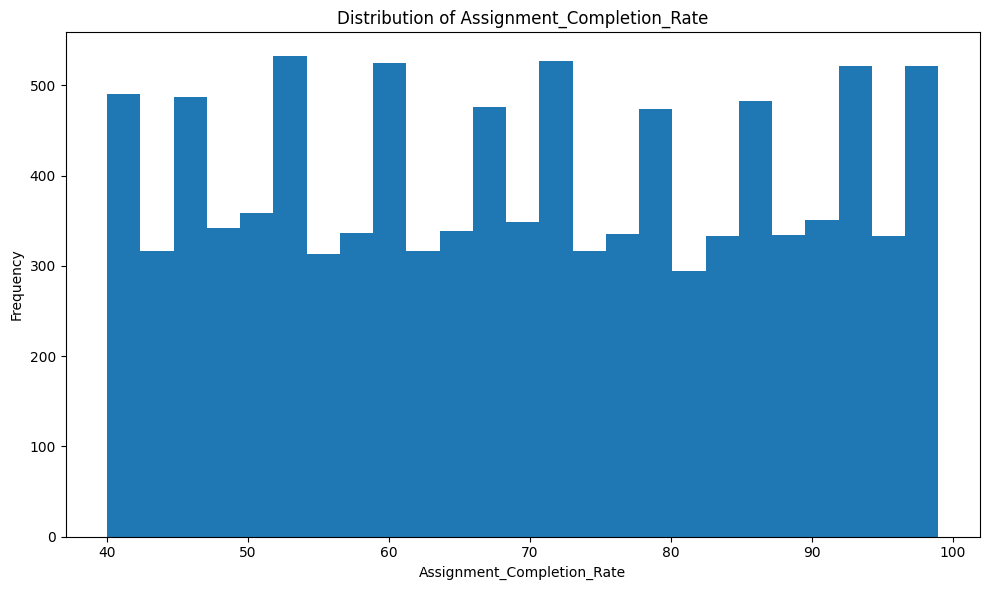

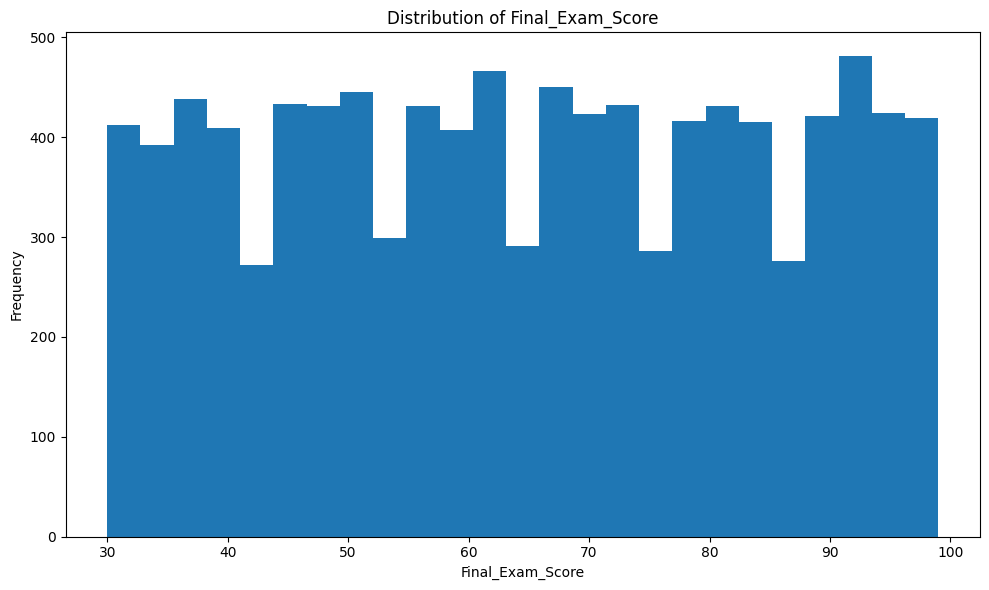

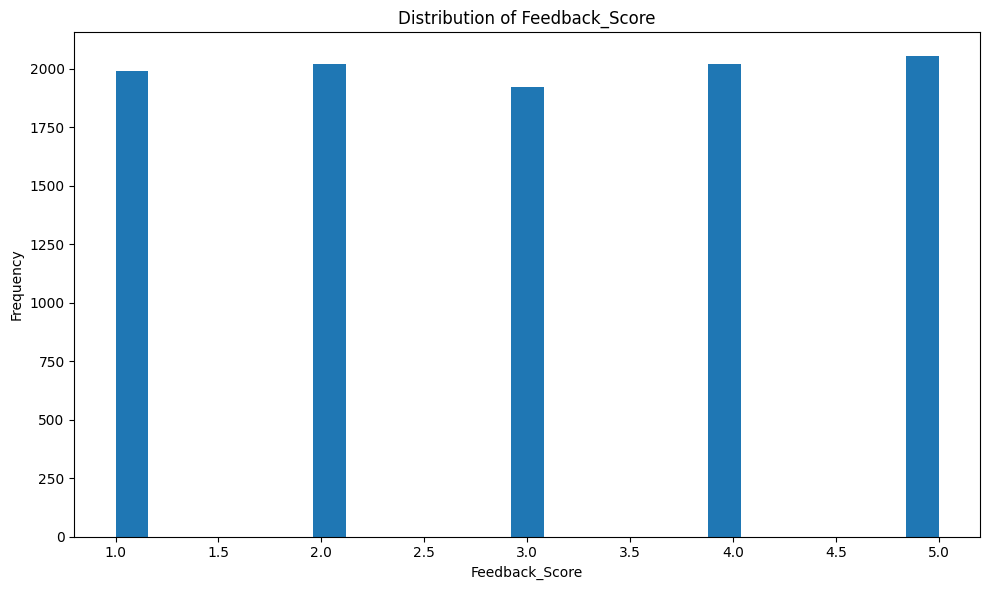

In [16]:
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data = df, x = col, bins = 25) # Bringing back the histogram but this time using it for numerical data alone.
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Key observations:** Although the dataset is engineered, the graphs above show that the data is not normally distributed for any of the features. For instance, consider the age distribution chart. Usually, you would expect a partiuclar age group to be significantly high, say 21 - 38. The age groups below 21 and above 38 would progressively reduce. This creates a bell-shaped-curve called Gaussian distribution.

However, in the synthetic learning behavior analysis dataset, there are spikes and dips between different age groups and the distribution is uniform. 

I am checking how the data is distributed as it will help me determine which statistical tests I need to use.

---

## Outlier detection

Checking if there are any values that appear incorrectly.

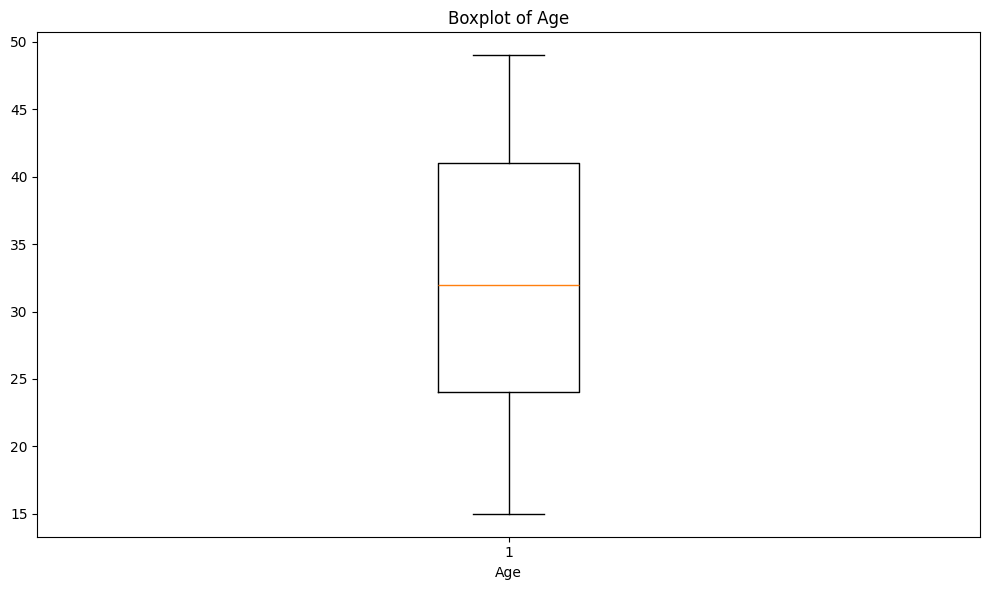

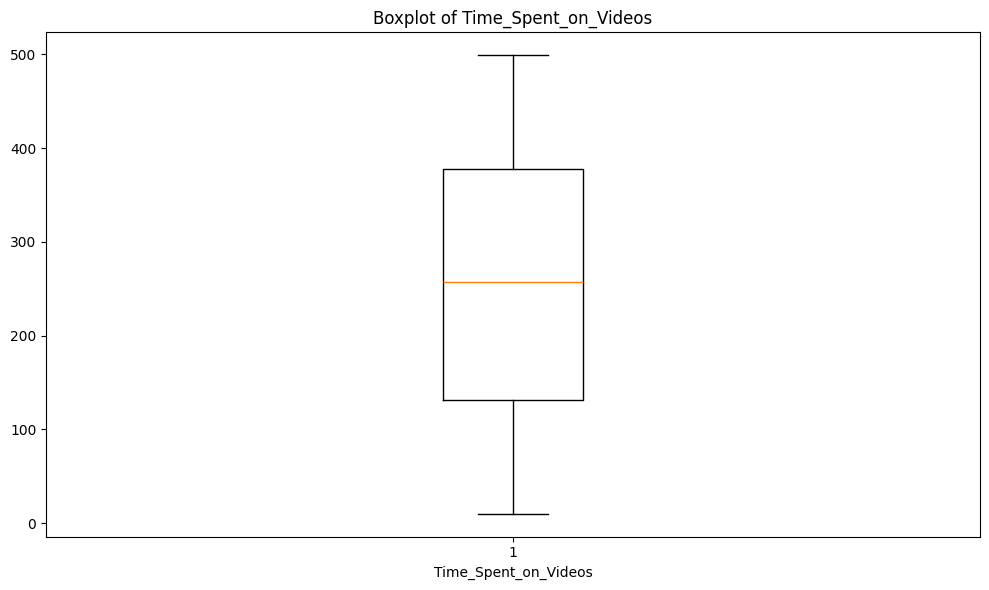

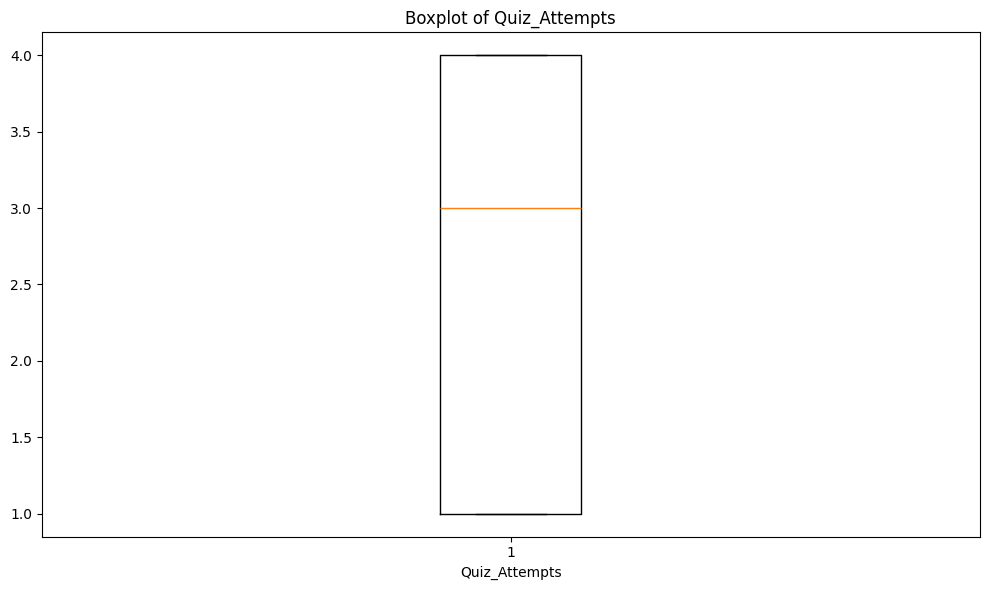

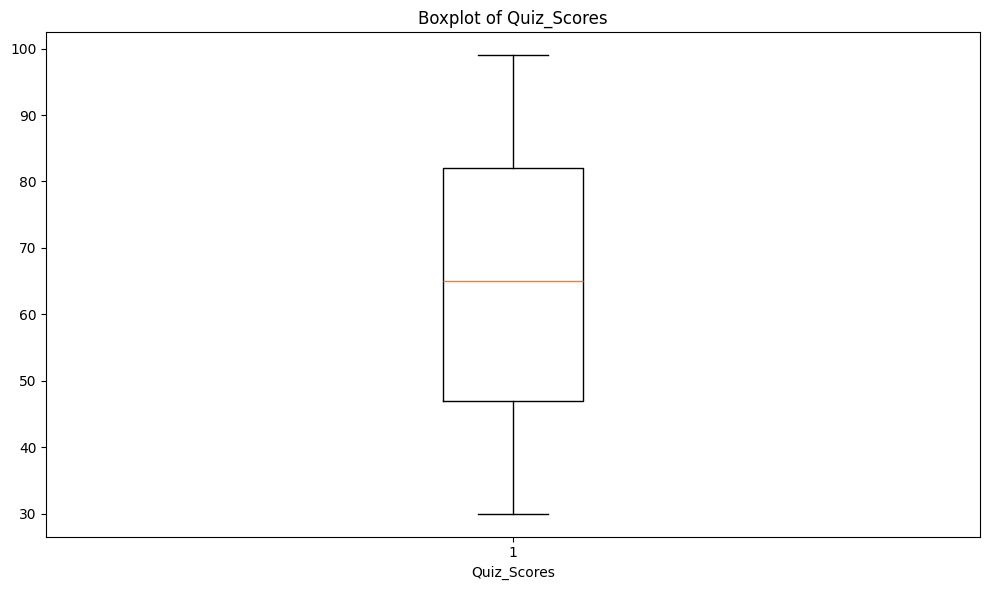

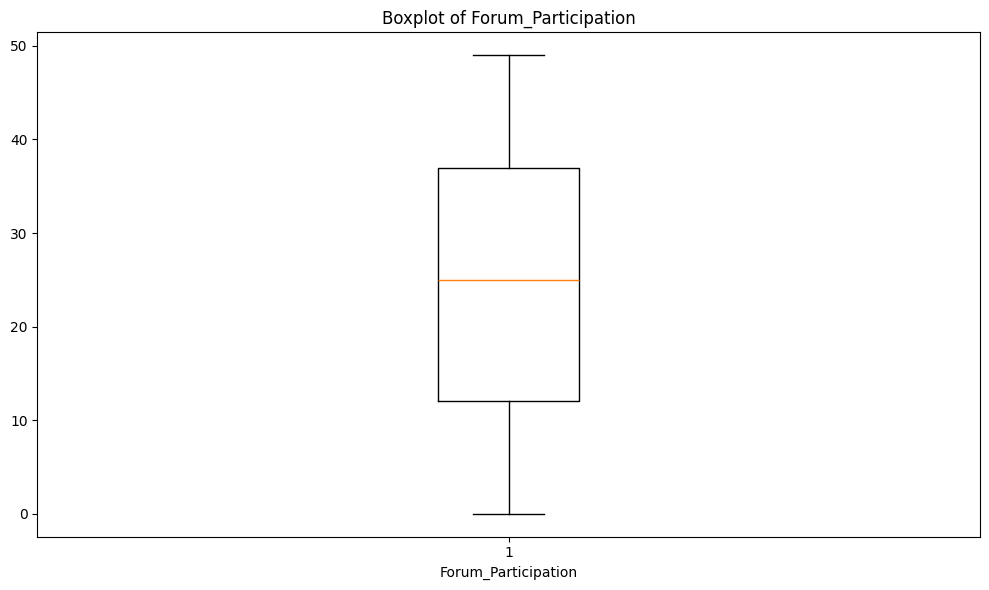

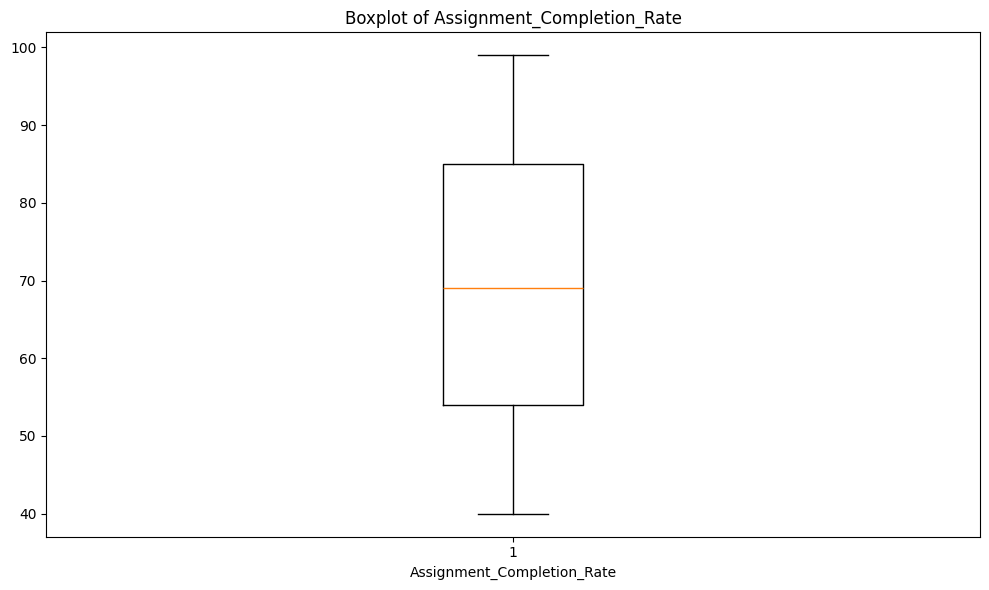

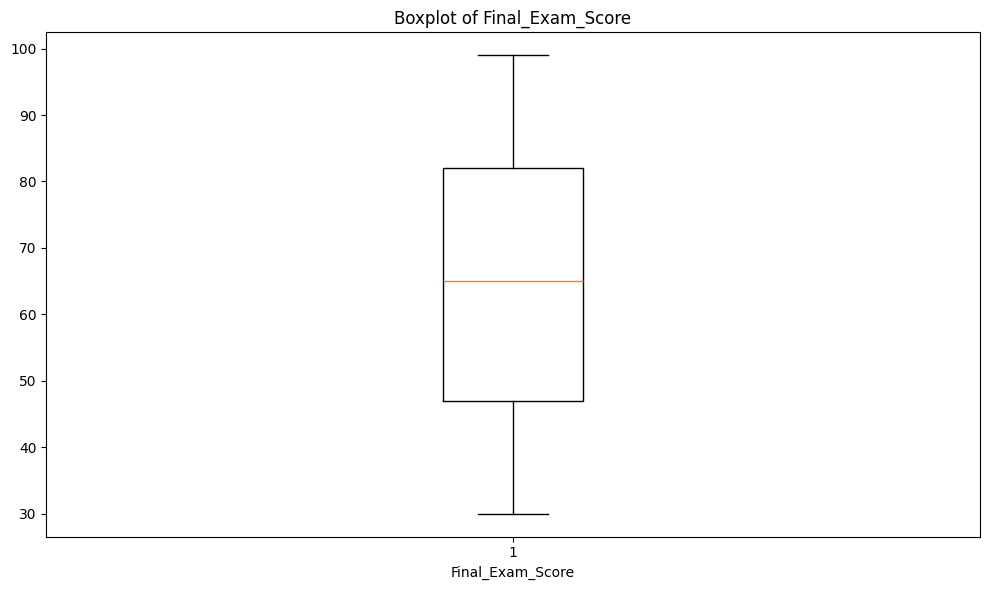

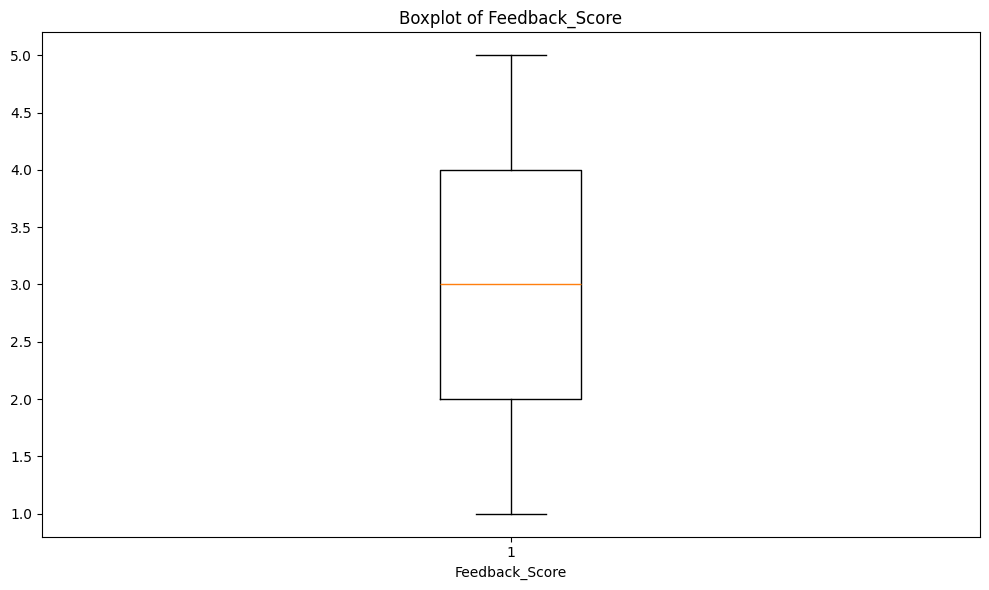

In [17]:
for col in df.select_dtypes(include = "number").columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data = df, x = col, showfliers = True) # Added showfliers on the second round as I did not find any outliers in the first iteration of running the cell.
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Source credit:** Used the Matplotlib section from the [LMS](https://learn.codeinstitute.net/courses/course-v1:CodeInstitute+PDAL+5/courseware/2b52fa3b450444b0bde8c984b5e0be9b/2d2ea2bf29134ae184766b26ffef91f7/) to remind myself of the boxplot code. 

Used ChatGPT to understand "showfliers" argument.

**Key observations:** The boxplots here indicate that there are no outliers. 

A value or score is an outlier when it is significantly different from the remaining values or scores in a feature. Sometimes outliers are actual observation and at other times, they are obvious errors.

Failing to detect and handle outliers can inflate values, leading to poor modeling. This means that the machine might learn patterns where there are none.

The boxplot contains the box, the median indicator, and whiskers (or the lines that extend from the box). Median refers to the "middle" value in a set of values upon arranging the values in the ascending order. The whiskers extend to the most far away values found within the feature. Any value that falls beyond the whiskers is an outlier, as it is significantly far away from other values in that feature.

The dataset I'm using does not contain outliers. Probably, that's because it is an engineered dataset.

The Quiz_Attempts boxplot appears to have no "whiskers", but they are just squished with the box. That happens because we are only dealing with values ranging from 1 to 4.

---

## Correlation analysis

Reviewing how numerical features are interacting with one another. 

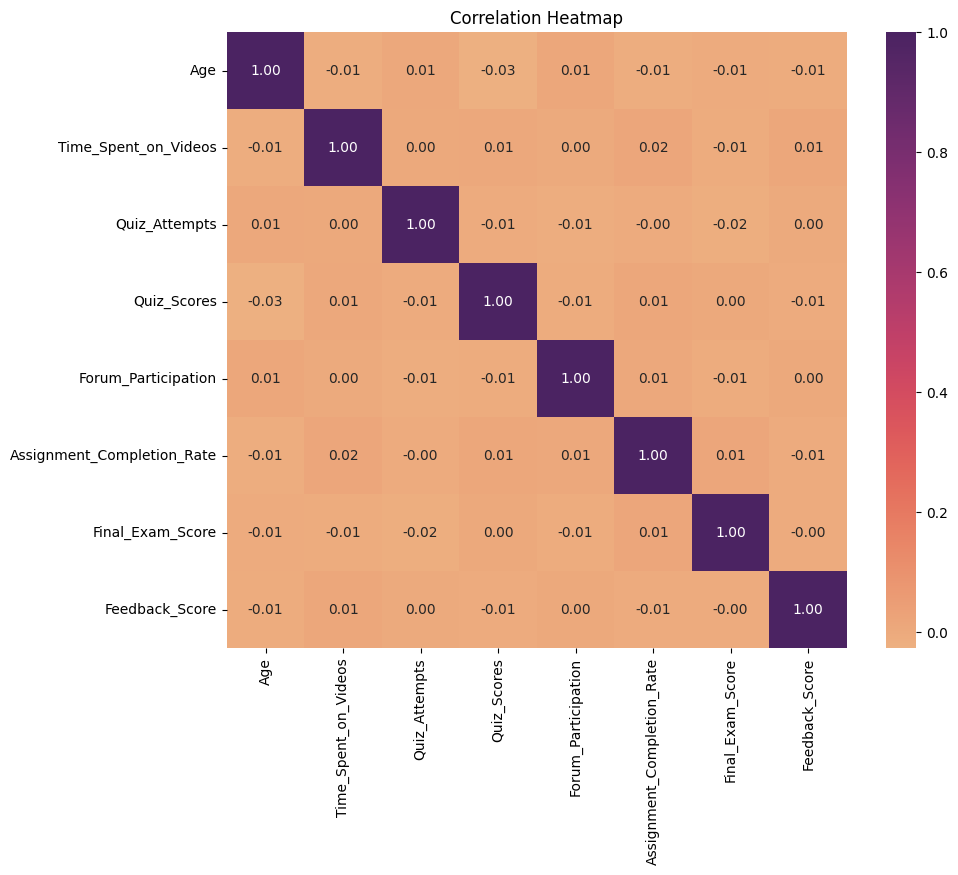

In [31]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.select_dtypes(include = "number").corr(), annot = True,
             cmap = "flare", fmt = ".2f")
plt.title("Correlation Heatmap"); #Understood that adding a semicolon suppresses the output.
#Visualizing the correlation through a heatmap. This will display any linear relationships between the numerical features.

A correlation analysis explains if any of the numerical features (such as Time_Spent_on_Videos and Final_Exam_Score) has a linear relationship with another feature. A linear correlation is when any changes in one value or behavior alters another value or behavior. 

For instance, if with an increased bill, the waiter received a larger tip, then the behavior (increase in bill) has a linear relationship with the outcome (tip). This instance is a positive correlation as increase in one value increases another value. A positive correlation is assigned a score of 0.8 - 1 on the heatmap.

A value or behavior could also have a negative correlation with another value or behavior when a change inversely impacts the other one. In the previous instance, if the bill increased and tip decreased then bill and tip are negatively correlated. A negative correlation is indicated with a minus score. 

In the synthetic dataset, there are no obvious, linear correlations that exist. A score close to zero indicates that there are neither positive nor negative correlations.

I must also note that correlation != causal relationship, meaning correlation **does not** imply causation. Sometimes, there are non-linear relationships that will need to be explored further. I will get to this during the Transformation phase of the project.

---

I understand the data better now and I'm ready to transform it to meet the business requirements I will close this phase here and move onto Transformation.

---

## Challenges

Data collection within digital learning is relatively limited. Key information such as learning style, feedback, and enagement needs to be collected more robustly. This will enable true personalization of learning.

Although correlation doesn't mean causation, I suspect issues such as the lack of linear correlation between obvious features, such as Quiz_Score and Final_Exam_Score to be partially because the dataset is synthetic. 

Having said that, I see the synthetic dataset setting the stage by providing a framework on what kind of data needs be collected.

---

## Solution

With advanced behavior tracking solutions, such as xAPI, data can be easily collected. However, the learners needs to be informed about the purpose of such data collection and the data should be anonymized.

Comprehensive tests and surveys can be leverage to understand learning styles. Rather than depending on single sources, such as a self-assessment, multiple sources can be used to determine the learning style.

I intend to use the synthetic dataset to build a model, which can later be used in a real-world scenario, once actual data is available. 

---

# Assumptions

1. The business intends to use synthetic data and build machine learning pipelines so that when real data becomes available, the logic from the pipelines can be used to draw insights from data.

2. Zero-value entries in the Forum_Participation column are valid.

32. Engagement_Level includes user activities such as:

    a. quiz activities(number of attempts, answers provided)

    b. assignment activities (how many assignments learners complete)

    c. the way learners leverage collateral educational resources (such as downloadable links, additional reading materials)

    d. interactivity data collated through xAPI

    e. forum participation

    f. questions asked or issues flagged (through the LMS or discussion forum)

4. Learning_Style is observed rather than self-assessed.

5. The bias in the dataset is alright for this sprint but needs to be handled in the next sprint.

6. The pass percentage on final exam score is 80%, which is an industry standard for the final assessments.

7. The responsibility to ensure engagement lies with the education service provider.

8. As the dataset is synthetic, inherently there are no ethical issues or privacy concerns associated with the data.

---

# Data copy

In [24]:
df_copy = df.copy()
df_copy.to_csv("data/copied_data/personalized_learning_dataset_copy.csv",
                index = False)
#Before closing this phase, I will copy the original dataset and Transform the copy. This will retain the original as is.

In [25]:
df_new = pd.read_csv("data/copied_data/personalized_learning_dataset_copy.csv")
df_new.head(10) #Checking the copied dataset to ensure that it is identical to the original.

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No
5,S00006,34,Male,Undergraduate,Web Development,184,1,87,34,70,Medium,43,Visual,4,No
6,S00007,45,Male,High School,Cybersecurity,454,3,69,46,83,Low,37,Kinesthetic,5,No
7,S00008,47,Male,High School,Cybersecurity,425,2,62,23,52,High,35,Reading/Writing,5,No
8,S00009,48,Male,Undergraduate,Cybersecurity,359,1,59,10,88,Medium,49,Reading/Writing,2,No
9,S00010,45,Female,Undergraduate,Data Science,263,4,63,30,99,Low,61,Auditory,3,No


---

# Summary

Findings from the Extract phase.

1. The dataset is clean, with no missing or duplicate values, and only valid zero entries in Forum_Participation, reflecting realistic learner behavior.


2. Categorical features such as Gender, Education_Level, Engagement_Level, and Dropout_Likelihood are imbalanced, while Course_Name and Learning_Style are uniformly distributed.

3. In the Transformation phase, the categorical features will be encoded for further analysis.

4. Numerical features do not follow a normal distribution, indicating the synthetic nature of the data and the need for careful selection of statistical methods.

5. No significant outliers were detected in the numerical features, supporting the reliability of the engineered dataset for analysis.

6. Correlation analysis shows no strong linear relationships between numerical features, highlighting the importance of exploring non-linear patterns in future phases.

**Credit:** Leveraged GitHub Copilot to generate the summary and modified it to fit the requirements.